<a href="https://colab.research.google.com/github/juliabui/csc408-411/blob/main/CSC408_Module_2_Linear_Regression_and_Distribution_Shift_CSC408.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Module 2 coding part 2: Linear Regression!**

*This notebook was created by Dr. Noelle Anderson (lecturer at San Francisco State University); datasets generated by Dr. Robert Poston (Scientist @ Neuron23).*

#OBJECTIVE OF THIS NOTEBOOK:

Welcome to your first notebook in the course! In this second module, you will explore 2 foundational algorithms for supervised Machine Learning- Linear (this notebook) and Logistic regression (next notebook). These models are simple, fast, and interpretable, making them useful for straightforward tasks with linear relationships or as baseline models to compare against more complex approaches.

Because these are supervised approaches, we must have a label/target to predict. Here we will apply linear regression to predict the continuous value Cellular IC50 in a simulated pharmacological dataset. IC50 is a common potency measure that indicates the compound concentration needed to inhibit 50% of a biological process and it is a common variable to model.

Here potency is represented as **pIC50**, the negative log of the IC50 value in molars. Taking the negative log of IC50 helps us interpet the values better so that high values = more potent compounds and a 1-unit increase in pIC50 means 10× more potency!

To learn more about IC50 and pIC50, see:
* https://simple.wikipedia.org/wiki/IC50
* https://www.graphpad.com/support/faq/50-of-what-how-exactly-are-ic50-and-ec50-defined/
* https://www.collaborativedrug.com/cdd-blog/what-is-pic50-2


In this notebook you will practice importing a csv (comma-separated-values) dataset from your google drive, exploring your data, and going through the basic steps of ML model building and predicting about the potency of different drug compounds. You will also use your model to predict for a new distinct pharmacological dataset to compare your predictions and better understand distribution shift.


We will first apply linear regression to predict the continuous value pIC50, let's learn a little more about it below.

---

Throughout the notebook there will be several videos walking you through the notebooks and code. You can adjust the quality and speed of the video and turn on captions as needed. You do not have to watch them to complete the notebooks but they may be helpful for understanding the flow, and I encourage you to NOT copy code from the video but instead do the prompts on your own.

*Note: Question 9 here is written slightly differently than in the video, follow the notebook text to get the same values from the video.*

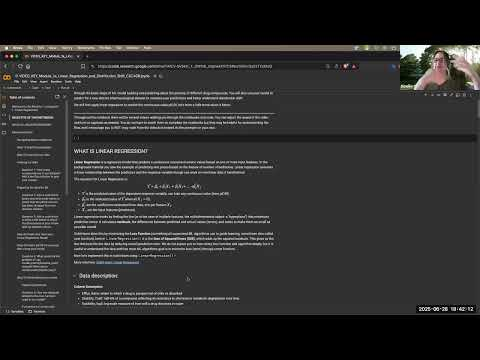

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('RKiBJPnRyZA', width='80%', height=800, allowfullscreen=True)

# WHAT IS LINEAR REGRESSION?

**Linear Regression** is a regression model that predicts a continuous outcome (numeric value) based on one or more input features. In the background material you saw the example of predicting rent prices based on the feature of number of bedrooms. Linear regression assumes a linear relationship between the predictors and the response variable though can work on non-linear data if transformed.

The equation for Linear Regression is:

$$ \hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2 + ... + \hat{\beta}_j X_j $$

- **$\hat{Y}$** is the predicted value of the dependent response variable, can take any continuous value (here pIC50)
- **$\hat{\beta}_0$** is the intercept (value of $\hat{Y}$ when all $X_j=0$).  
- **$\hat{\beta}_j$** are the coefficients estimated from data, one per feature $X_j$.  
- **$X_j$** are the input features (predictors).

Linear regression works by finding the line (or in the case of multiple features, the multidimensional object- a "hyperplane") that minimizes prediction errors. It calculates **residuals**, the differences between predicted and actual values (errors), and seeks to make them as small as possible overall.


Scikit-learn does this by minimizing the **Loss Function** (something all supervised ML algorithms use to guide learning, sometimes also called cost function), here in `LinearRegression()` it is the **Sum of Squared Errors (SSE)**, which adds up the squared residuals. This gives us the line that best fits the data by reducing overall prediction error. We do not expect you to learn every loss function and algorithm deeply, but it is useful to understand the idea and that most ML algorithms goal is to minimize loss (error) through some function.

Now let's implement this in scikit-learn using `LinearRegression()` !


More info here: [Scikit-learn: Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


# Data description:

**Column Descriptors**
*   Efflux_Ratio: extent to which a drug is pumped out of cells vs absorbed
*   Stability_Thalf: half-life of a compound, reflecting its resistance to chemical or metabolic degradation over time.
*   Solubility_logS: log-scale measure of how well a drug dissolves in water
*   Plasma_Protein_Binding: percent of drug bound to blood proteins and thus inactive
*   logD: lipophilicity at physiological pH, influencing membrane permeability
*   Molecular_weight: size of the drug molecule, affecting transport and absorption
*   Cellular_pIC50: Negative logarithm of the molar concentration required to inhibit a cellular target by 50% (our target to predict)


---

## Navigating these notebooks

Before working on our model we need to import all Packages and specific Functions that we will need to use in order to work with our data.

- **Packages** are essentially prepackaged code that others have made, that are often organized in chunks of code called modules, A package can contain many modules and these modules may contain several functions.

- **Functions** are essentially a set of instructions to a computer that specify how to handle different types of files, what mathematical equations are used to calculate our model, how our graphs are going to be displayed, etc.


The code in this notebook is organized in **Cells**

Add a new cell by hovering over the edge of one above or doing '+ Code' or '+ Text' from the upper left menu bar.

In the example below we will learn how to execute or "run" each of the three cells, so that our code actually takes effect.To run the code in a cell select the cell and press the play button on the upper left part of the cell. Hitting command-enter while in a cell should also work. You can also click 'Runtime' in the tab bar for more running options.

**Note**: `The lines of green text that are preceded by a "#" are called comments, they exist only to provide explanations of what each line or chunk of code does. They are not actually part of the code. When you add new code, please comment what it does (this is part of the grade).`

##**Step 1) Importing packages**

Here we importing all the necessary packages – we'll explain what they do later when we use them. You may get a warning when you run the first cell about "not authored by google", don't worry about this!

In [ ]:
# Importing packages that deal with data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Importing packages dealing with Machine Learning modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *

Connect to google drive below. To retrieve files stored in our google drive, we can run the command below, agree to the prompts, and then provide the location and name of the file in the 'filepath' variable below.

In [ ]:
# Imports for file management; agree to prompts
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Step 2) Importing our data**


You will need to first download the Module 1 data file from Canvas, then create a folder called 408Data in your Google Drive to upload them in.

When you upload the data files to your Google Drive, you will need to click the buttons + New > File upload instead of dropping the file in or the below will fail.

Before we proceed, let's list the files in the Google Drive folder you placed your file cellular potency files in. If you see your two Cellular_IC50_simData files, great- if not, troubleshoot! If your files end in .gsheets instead of .csv, please see the upload instructions above.

In [ ]:
# You may need to change the last part '408Data' here and below depending on your own folder name
!ls -la '/content/drive/MyDrive/CSC408/DataFiles_408Module2'

total 49
-rw------- 1 root root 24581 Jun  7 04:05 Cellular_IC50_simData_compoundType2.csv
-rw------- 1 root root 24629 Jun  7 23:00 Cellular_IC50_simData.csv


In [ ]:
# May need to change the '408Data' part below to match the name of your own google drive folder you are storing these in

file_path = '/content/drive/MyDrive/CSC408/DataFiles_408Module2/Cellular_IC50_simData.csv'
data = pd.read_csv(file_path, index_col=0) # read in and make the compound IDs the row indices

data.head() # View top of the file

,Efflux_Ratio,Stability_Thalf,Solubility_logS,Plasma_protein_binding,logD,Molecular_weight,Cellular_pIC50
Compound_ID,,,,,,,
1,1.704399,77.217932,-1.261656,98.514407,2.256826,584.040310,6.475840
2,1.310502,97.272534,-3.419618,86.592958,2.708190,616.128888,6.211943
3,2.347735,45.057818,-1.177307,67.484839,0.732234,576.910424,7.386949
4,4.231124,137.004557,-1.412324,79.691917,3.511752,548.697515,7.574750
5,1.947338,93.880462,-2.397794,90.998323,2.074247,508.319133,7.034289


## Viewing our data

In [ ]:
# View data dimensions
data.shape

(200, 7)

### **Question 1:** How many compounds are in our dataset? Add a text block below to give your answer.

In [ ]:
# Let's make sure the datatypes are suitable, numeric values are needed, double-precision floating-point values (float64) are best
data.dtypes

,0
Efflux_Ratio,float64
Stability_Thalf,float64
Solubility_logS,float64
Plasma_protein_binding,float64
logD,float64
Molecular_weight,float64
Cellular_pIC50,float64


In [ ]:
# Check the summary statistics of each column
data.describe()

,Efflux_Ratio,Stability_Thalf,Solubility_logS,Plasma_protein_binding,logD,Molecular_weight,Cellular_pIC50
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.809065,60.820394,-1.911856,84.088784,2.058304,571.961785,6.162293
std,0.901829,27.928854,0.786117,10.328852,0.706013,46.175379,1.221980
min,0.500000,-24.708821,-4.000000,56.680508,-0.072880,400.000000,2.958311
25%,2.284525,43.928489,-2.428332,77.807829,1.540943,541.500358,5.262431
50%,2.858512,61.073407,-1.906735,84.443124,2.018098,574.422281,6.168621
75%,3.413744,80.061456,-1.332794,90.709508,2.522592,599.411012,7.031213
max,5.000000,137.004557,0.000000,115.370545,4.158778,700.000000,8.919082


In [ ]:
# Checking for missing values
data.isnull().sum()

,0
Efflux_Ratio,0
Stability_Thalf,0
Solubility_logS,0
Plasma_protein_binding,0
logD,0
Molecular_weight,0
Cellular_pIC50,0


Here we don't have any missing values, but in the next Module and course you will explore these more since most ML algorithms cannot handle missing values directly.

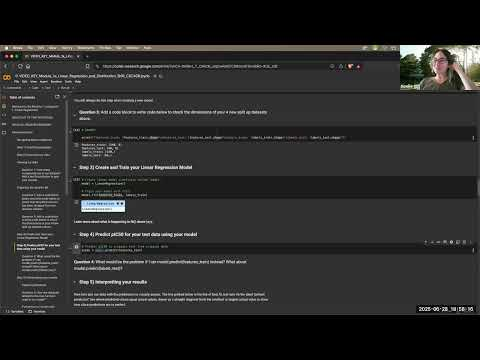

In [ ]:
YouTubeVideo('nEFLBHhmXbo', width='80%', height=800, allowfullscreen=True)

##**Preparing the data for ML**

In ML pipelines, we always first need to separate our data that will inform predictions (**features**) and the data we want to predict (**target or labels**). You can imagine how training a model while including the target would give the answer away.

In [ ]:
#Separating the labels dataset and the features dataset
labels = np.array(data['Cellular_pIC50'])

features = data.drop(columns=['Cellular_pIC50'])
# We drop the target variable from the feautures that will be used to train our model

### **Question 2:** Add a code block below and write code below to check that the pIC50 column has been dropped from our features dataset.

In [ ]:
print(features.columns)

Index(['Efflux_Ratio', 'Stability_Thalf', 'Solubility_logS',
       'Plasma_protein_binding', 'logD', 'Molecular_weight'],
      dtype='object')


Now that we have separate data objects for the labels and features, we are now ready to split our training and testing data.

In machine learning, it is common to split a dataset in two. A larger chunk will be the training data and a smaller chunk will be the test data. The idea is that you build a predictive model with the training data and then you use the test data to see if your model is any good. Here we will do the splitting, using a function called train_test_split from scikit-learn.

* **test_size** = 0.3. Gives the proportion of the dataset to include in the test set. 0.3 represents 30%.
* **random_state** = 42. Setting the random state to any arbitrary value ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator to set the internal state. This ensures that the random numbers are generated in the same order and therefore you get exactly the same results when you re-run the code and you also get the same results as someone else in the class. More details - [Random_state](https://scikit-learn.org/stable/glossary.html#term-random_state)

In [ ]:
# Splitting the training and testing data from our features and labels
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

You will always do this step when creating a new model.

### **Question 3:** Add a code block to write code below to check the dimensions of your 4 new split up datasets above.  

In [ ]:
features_train.shape

(140, 6)

##**Step 3) Create and Train your Linear Regression Model**

In [ ]:
# Create linear model creatively called 'model'
model = LinearRegression()

# Train your model with fit()
model.fit(features_train, labels_train)

LinearRegression()

**Learn more about what is happening in fit() above [here](https://www.youtube.com/watch?v=9L7r3Uc4fGU&ab_channel=dataminingincae)**

##**Step 4) Predict pIC50 for your test data using your model**

In [ ]:
# Predict pIC50 in original test from original data
preds = model.predict(features_test)

### **Question 4:** What would be the problem if I ran model.predict(features_train) instead? What about model.predict(labels_test)?

##**Step 5) Interpretting your results**

Now let's plot our data with the predictions to visually assess. The line printed below is the line of best fit, but here it’s the ideal “perfect prediction” line where predicted values equal actual values, drawn as a straight diagonal from the smallest to largest actual value to show how close predictions are to perfect.

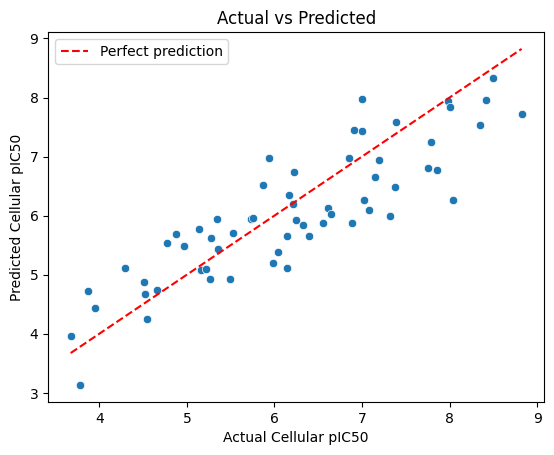

In [ ]:
# plotting our data with a line representing where data would fall if predictions were perfect

sns.scatterplot(x=labels_test, y=preds)

# Ideal prediction line (pred = actual)
plt.plot([labels_test.min(), labels_test.max()],
         [labels_test.min(), labels_test.max()], 'r--', label='Perfect prediction')

plt.xlabel("Actual Cellular pIC50")
plt.ylabel("Predicted Cellular pIC50")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

### Exploring Residuals

Residuals in regression are the differences between the actual values and the values predicted by the model (what you see in the RMSE equation below in parentheses).

They show how much the model's predictions miss the true data points by. Smaller residuals mean the model fits the data better. While you’re learning about linear regression, know that residuals are important in many other models too, even ones you haven’t seen yet, because they always help measure how well a model predicts compared to the real values.

Below we plot our data again but this time draw lines representing the residuals, long lines represent large differences between true and predicted values, while short lines represent good predictions.










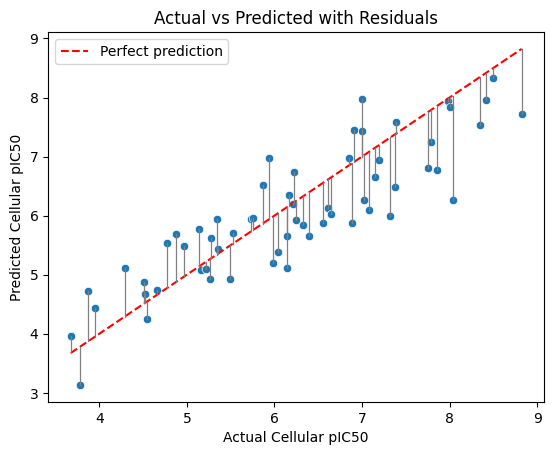

In [ ]:
# Replot the data, this time with residuals

sns.scatterplot(x=labels_test, y=preds)

# Draw perfect prediction line (predidctions = actual)
plt.plot([labels_test.min(), labels_test.max()],
         [labels_test.min(), labels_test.max()], 'r--', label='Perfect prediction')

# Using zip to make tuples on the fly of actual pIC50 and predicted pIC50 per sample
testPred_pairs = zip(labels_test, preds)

# Draw residuals: vertical lines from predicted to actual values
for actual, pred in testPred_pairs: # iterate over the pairs zip made
    plt.plot([actual, actual], [pred, actual], 'gray', linewidth=0.9)

plt.xlabel("Actual Cellular pIC50")
plt.ylabel("Predicted Cellular pIC50")
plt.title("Actual vs Predicted with Residuals")
plt.legend()
plt.show()

### **Question 5:** How are residuals related to the loss function used in our model?

### Evaluating our results with RMSE


**Root Mean Squared Error (RMSE)** - The RMSE measures the average magnitude of the error in the same units as the target variable. The difference between predicted and observed values (residuals) are each squared (remember SSE above) and then averaged over the sample (This gives MSE- Mean Squared Variance, we'll cover in Module 2). Finally, the square root of the MSE is taken. Since the errors are squared before they are averaged, RMSE gives a relatively high weight to large errors and the directionality of those errors are treated agnostically (doesn't matter if it is an under- or over-estimate).

The RMSE equation is:

$$
\mathrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
$$

Where:
\begin{aligned}
& n: \text{number of data points} \\
& y_i: \text{actual value for point } i \\
& \hat{y}_i: \text{predicted value for point } i \\
\end{aligned}


In [ ]:
# Evaluate our model's performance with RMSE

rmse = root_mean_squared_error(labels_test, preds)
print("RMSE:", round(rmse, 2))

RMSE: 0.66


The above RMSE score tells us that on average, our model’s predicted pIC50 values are about 0.66 units (remember this is in log scale though) off from the true values. Even though RMSE is in our target variable units, without thinking about how the data is distributed this can still be hard to interpret.

You can imagine if your model has an RMSE of 2 when predicting exam scores that mostly fall between 78 and 82, it might seem like a low error, but because the actual scores barely vary, an RMSE of 2 is actually quite bad.

Comparing the RMSE to 1 standard deviation of the target variable can be helpful for understanding whether the model's prediction error is small relative to the natural variability in the data:








In [ ]:
std = round(np.std(labels_test), 2)
print(std)

1.29


Because our RMSE is less than 1 standard deviation, this means that our model’s average prediction error is smaller than the natural variability in the target, as in— it performs better than simply predicting the mean every time, yay!



### Evaluating our model with R²

While comparing RMSE to one standard deviation helps us understand error relative to the variability in the target, we still may need a single, standardized score to evaluate model performance across different datasets or scales.

The **R², the Coefficient of Determination** helps here- R² is the proportion of the variance in the target variable (our label to predict) that is predictable from the feature variables. R² compares how well your model predicts the target variable versus simply predicting the mean every time.


The formula for the Coefficient of determination R² is:

$$
R^2 = 1 - \frac{\text{SSE}}{\text{SST}}
$$

where:

* $\text{SSE} = \sum (y_i - \hat{y}_i)^2$: the sum of squared differences between actual values and model predictions (the residuals)
* $\text{SST} = \sum (y_i - \bar{y})^2$: the total sum of squares—how far actual values deviate from the mean.

So $R^2$ tells us how much better the model is than just using the mean of $y$ as a prediction.

* If the model fits perfectly: $\text{SSE} = 0$, so $R^2 = 1$.
* If the model is no better than the mean: $\text{SSE} \approx \text{SST}$, so $R^2 \approx 0$.
* If the model is worse than the mean: $\text{SSE} > \text{SST}$, making $R^2 < 0$.

So $R^2$ compares model error to baseline error from the mean, using residuals from both.


[See here for more info](https://www.statology.org/sst-ssr-sse/)

In [ ]:
# Evaluate our model's fit with R²
r2 = r2_score(labels_test, preds)
print("R²:", round(r2, 3))

R²: 0.74


R² = 0.74 means 74% of the variance in pIC50 can be explained by patterns in our input features our model is using, and the remaining 26% is unexplained and likely noise and model error.

### Interpretting Feature Coefficients (Different from coefficient of determination)

Feature coefficients tell us the weight and direction of each feature on our target variable pIC50. (This is different from the model-level coefficients of determination above)

Howver, because each feature is on a different scale with different variances, we cannot directly compare them. A large coefficient on a feature with very little variation across the dataset may appear important, but in practice, it will contribute little to model predictions because the feature doesn’t change much accross samples.

Standardizing the coefficients by multiplying each by the standard deviation of its feature helps correct for this by expressing the effect in terms of a **one standard deviation change**. This allows for meaningful comparisons across features with different units and ranges, helping us understand which features actually influence the outcome the most.

In [ ]:
# Print standadrized coefficients
stdNormd_coef = model.coef_ * features.std(axis=0)  # axis=0 means apply columnwise
stdNormd_coef

,0
Efflux_Ratio,-0.631128
Stability_Thalf,0.442956
Solubility_logS,0.440046
Plasma_protein_binding,-0.509558
logD,0.116772
Molecular_weight,-0.092860


### **Question 6:** Look at the model's standardized coefficients and consider what biological interpretations you can gain from them. Answer A-C below.

A) Which feature(s) most positively contributes to changes in pIC50?

B) Which feature(s) most negatively contributes to changes in pIC50?

C) Which feature contributes the least to changes in pIC50?

# Part two of Notebook 1a: What happens if we use our model on different data?

Now we will load in a new simulated dataset, say for a different drug class. Here we'd like to ask- how well does our model trained on our first dataset do on data from a different class of drugs?

*Note this will only work if the datasets have the same features.*

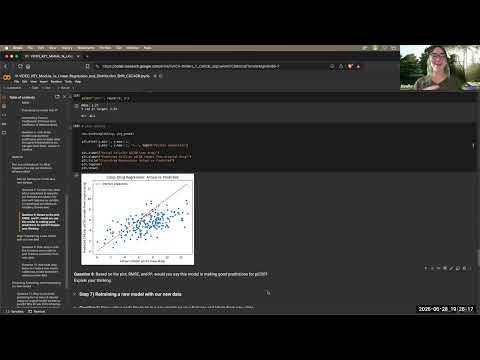

In [ ]:
YouTubeVideo('gpJuol4CndI', width='80%', height=800, allowfullscreen=True)

##**Step 6) Testing our model on a new dataset**

In [ ]:
# May need to change the 408Data part below to match the name of your own google drive folder you are storing these in
file_path2 = '/content/drive/MyDrive/CSC408/DataFiles_408Module2/Cellular_IC50_simData_compoundType2.csv'

new_data = pd.read_csv(file_path2, index_col=0)

In [ ]:
new_data.head()

,Efflux_Ratio,Stability_Thalf,Solubility_logS,Plasma_protein_binding,logD,Molecular_weight,Cellular_pIC50
Compound_ID,,,,,,,
1,4.996961,86.367965,-3.308296,34.159060,2.943712,832.773366,10.134082
2,4.567464,38.523356,-3.706197,52.315234,3.710798,725.546130,9.947332
3,4.235909,29.499694,-1.544783,62.535785,3.382350,867.797437,8.929320
4,5.242772,84.399848,-1.270420,112.975183,2.872456,813.772604,6.911029
5,4.940754,91.190368,-2.505023,42.608198,2.626648,779.539115,7.723947


### **Question 7:** For your new_data, add a code block to separate out features and labels, this time with features as variable X (uppercase) and labels as variable y (lowercase).

In [ ]:
y = np.array(new_data['Cellular_pIC50'])

X = new_data.drop(columns=['Cellular_pIC50'])

In [ ]:
# Splitting the training and testing data from our features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now, let's make predictions for our new data using our first model we trained.

In [ ]:
# Create linear model creatively called 'model'
model2 = LinearRegression()

# Train your model with fit()
model2.fit(features_train, labels_train)

LinearRegression()

In [ ]:
# No need to retrain a new model just yet- here we are still using our original model

# Predict on new_data using model trained on original data
y_preds = model.predict(X)

Let's evaluate our results using RMSE, R², and plotting.

In [ ]:
# Evaluate
rmse = root_mean_squared_error(y, y_preds)
r2 = r2_score(y, y_preds)

print("RMSE:", round(rmse, 2))
print("1 std of target:", round(np.std(y), 2))

print("\nR²:", round(r2, 2))

RMSE: 2.77
1 std of target: 2.53

R²: -0.2


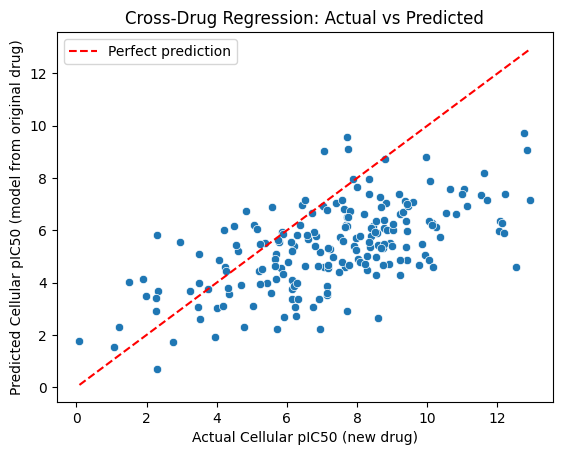

In [ ]:
# plot results

sns.scatterplot(x=y, y=y_preds)

plt.plot([y.min(), y.max()],
         [y.min(), y.max()], 'r--', label='Perfect prediction')

plt.xlabel("Actual Cellular pIC50 (new drug)")
plt.ylabel("Predicted Cellular pIC50 (model from original drug)")
plt.title("Cross-Drug Regression: Actual vs Predicted")
plt.legend()
plt.show()

### **Question 8:** Based on the plot, RMSE, and R², would you say this model is making good predictions for pIC50? Explain your thinking.

##**Step 7) Retraining a new model with our new data**


### **Question 9:** Now, prepare to create and train a new model by splitting up your training and testing data.

*Hint: You will only get the same results from the video and text below if you set random_state=42 in this step.*

In [ ]:
# model= Use the original model that we created first

### **Question 10:** Add code lines below to create a new model called new_model and train it using your new data.

# Predicting, Evaluating, and Interpretting our new results

In [ ]:
# Predict pIC50 in new test from new data
new_preds = model3.predict(X_test)

# Evaluate
rmse = root_mean_squared_error(y_test, new_preds)
r2 = r2_score(y_test, new_preds)

print("RMSE:", round(rmse, 2))
print("1 std of target:", round(np.std(y_test), 2))

print("\nR²:", round(r2, 3))

RMSE: 2.12
1 std of target: 2.83

R²: 0.44


You may notice that **RMSE did not change much**, while R² did — this is a great illustration of the difference between these two metrics.

The prediction error (as measured by RMSE) only slightly improved — it's now at least **slightly lower than 1 standard deviation**, which is a step in the right direction. But even small improvements in RMSE can lead to **large changes in R²**, especially when moving from a very poor baseline model.

If you used the same random_state of 42 train_test_split as I did above, the new model’s R² is around **0.44** — still not great, but it means our model can now explain **44% of the variance in pIC50**, which is a big improvement over the **negative R²** we had before (when the model performed worse than just predicting the average pIC50 for every sample).

This remaining underperformance could mean a few things:
- We may need a increased number or more informative features that are better correlated with the target variable.
- Or, it may be that a linear model is too simple to capture the underlying relationships in the data; you'll learn more complex models and about oversimplified models in Module 3.


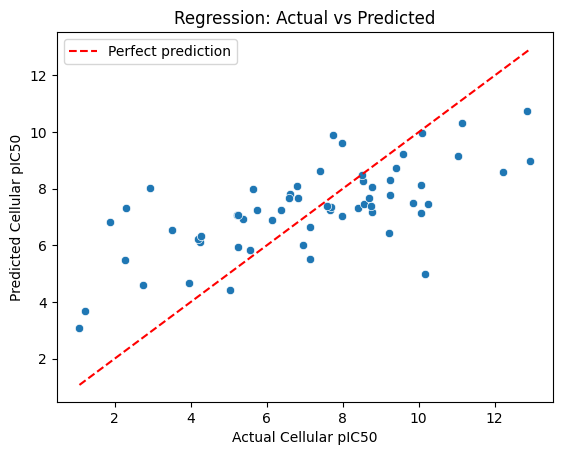

In [ ]:
# plotting our new data against our new predictions

sns.scatterplot(x=y_test, y=new_preds)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--', label='Perfect prediction')

plt.xlabel("Actual Cellular pIC50")
plt.ylabel("Predicted Cellular pIC50")
plt.title("Regression: Actual vs Predicted")
plt.legend()
plt.show()

Still not an amazing fit, but certainly much better than before!

### **Question 11:** Why do you think predicting for our second dataset using our original model worked so poorly? Why do you think retraining the model improved your results?

# Visualizing Distribution Shift


What we see here is broadly called Distribution Shift- where the distributions of features and targets, and thus also their relationships to each other, can change depending on our training data. Most ML assumes train/test data distributions match. Making sure our training data is appropriate for the thing we are predicting is KEY in ML.

Here we were trying to make predictions for a different drug class that likely has different properties, so our model trained on our original data does not generalize well to give good predictions on a different drug type.

Another example of this could be temporal. If I predict COVID rates for 2025 using a model trained on 2020 data, I will not be capturing the updated data distributions and feature-target relationships.

Let's visualize these distribution shifts below by plotting our target and each feature in our original dataset vs our new dataset.

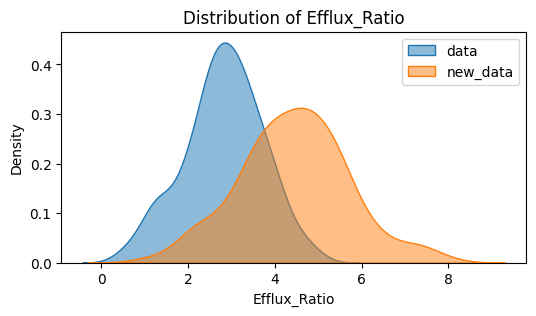

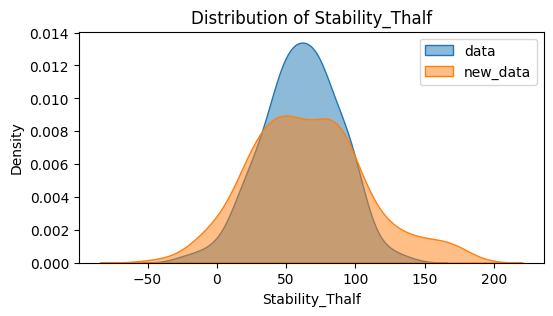

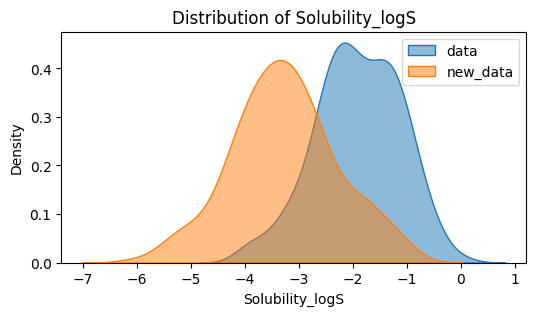

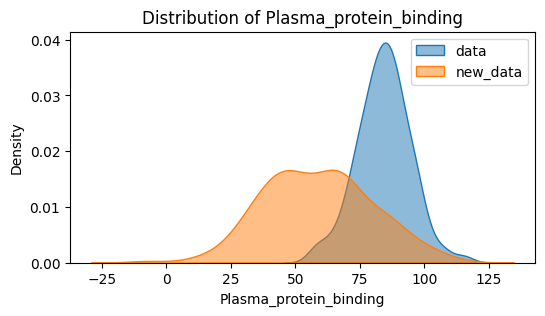

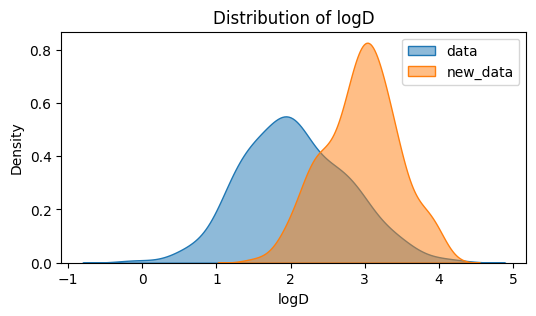

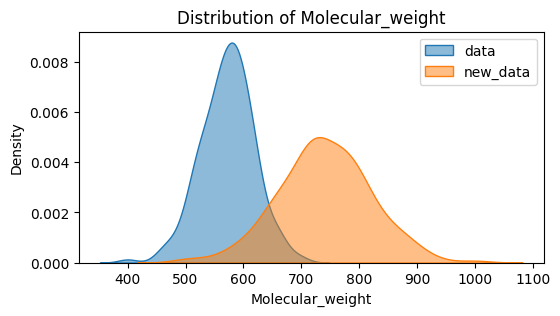

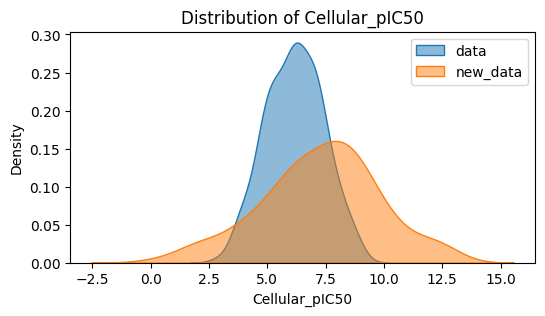

In [ ]:
# Plotting distributions of columns in data vs new_data

for col in data.columns:
    plt.figure(figsize=(6,3))
    sns.kdeplot(data[col], label='data', fill=True, alpha=0.5)
    sns.kdeplot(new_data[col], label='new_data', fill=True, alpha=0.5)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

Here we can see that while the distribution of some features like Stability_Thalf was fairly consistent between datasets, other features shifted dramatically, so our algorithm that learned the patterns and relationships from dataset 1 couldn't give good predictions for dataset 2.

###**Question 12:**

Write down one thing you learned today and one thing that confuses you.

# 🙂 Congratulations on completing your first colab notebook in this course!!

Here we explored Linear Regression for predicting pIC50 and Distribution Shift. In the next notebook, we will cover Logistic Regression for classificationof low and high potency drugs instead!